# Star Wars Survey Project

## The goal of this project is to determine which movie in the Star Wars series is the favorite among fans and nonfans. To do so, a spreadsheet containing over 1000 survey responses (from Kaggle) will be imported as a dataframe, cleaned (to the extent necessary for analysis), and presented visually using tables.

In [26]:
import numpy as np
import pandas as pd

In [27]:
star_wars = pd.read_csv('StarWars.csv', encoding='ISO-8859-1')

In [28]:
star_wars.shape

(1187, 38)

In [29]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I äóñ The Phantom Menace,Star Wars: Episode II äóñ Attack of the Clones,Star Wars: Episode III äóñ Revenge of the Sith,Star Wars: Episode IV äóñ A New Hope,Star Wars: Episode V äóñThe Empire Strikes Back,Star Wars: Episode Vi äóñReturn of the Jedi,Star Wars: Episode I äóñ The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I äóñ The Phantom Menace,Star Wars: Episode II äóñ Attack of the Clones,Star Wars: Episode III äóñ Revenge of the Sith,Star Wars: Episode IV äóñ A New Hope,Star Wars: Episode V äóñThe Empire Strikes Back,Star Wars: Episode Vi äóñReturn of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I äóñ The Phantom Menace,Star Wars: Episode II äóñ Attack of the Clones,Star Wars: Episode III äóñ Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I äóñ The Phantom Menace,Star Wars: Episode II äóñ Attack of the Clones,Star Wars: Episode III äóñ Revenge of the Sith,Star Wars: Episode IV äóñ A New Hope,Star Wars: Episode V äóñThe Empire Strikes Back,Star Wars: Episode Vi äóñReturn of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Let's start by cleaning up some of the oddities and inconsistencies in each movie name string.

In [30]:
for column in star_wars.columns[3:11]:
    star_wars[column] = star_wars[column].str.replace('äóñ ', '').str.replace('äóñ', '').str.replace('Vi', 'VI')
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [31]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [32]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

In [33]:
movie_mapping = {
    'Star Wars: Episode I The Phantom Menace': True,
    np.nan: False,
    'Star Wars: Episode II Attack of the Clones' : True,
    'Star Wars: Episode III Revenge of the Sith' : True,
    'Star Wars: Episode IV A New Hope' : True,
    'Star Wars: Episode V The Empire Strikes Back' : True,
    'Star Wars: Episode VI Return of the Jedi' : True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [34]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Renaming some columns for the sake of clarity:

In [35]:
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.' : 'seen_1',
    'Unnamed: 4' : "seen_2",
    "Unnamed: 5" : 'seen_3',
    'Unnamed: 6' : 'seen_4',
    'Unnamed: 7' : 'seen_5',
    'Unnamed: 8' : 'seen_6'
})

In [36]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do yo

In [37]:
star_wars = star_wars.drop(0, axis=0)
star_wars[star_wars.columns[9:15]].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


In [38]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'ranking_1',
    'Unnamed: 10' : "ranking_2",
    "Unnamed: 11" : 'ranking_3',
    'Unnamed: 12' : 'ranking_4',
    'Unnamed: 13' : 'ranking_5',
    'Unnamed: 14' : 'ranking_6'
})

In [39]:
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [40]:
rankings = star_wars[star_wars.columns[9:15]].mean()
print(rankings)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


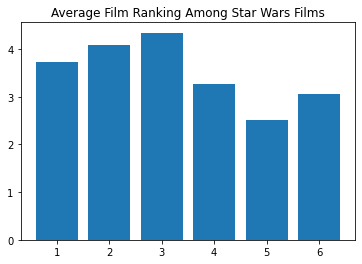

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1,7), rankings)
plt.title('Average Film Ranking Among Star Wars Films')
plt.show()

So far we have:
- Removed the first row of the dataset, it is a secondary header
- Renamed ambiguous header names to be more clear
- Replaced Yes/No answers with True/False values
- Converted rankings to float types which allowed us to take the mean of each ranking column and create a bar chart comparison

We can see that our survey respondents favor the fifth movie in the series with the lowest average ranking (2.51). Movies 4, 5, and 6 are all favored above movies 1, 2, and 3. This may be partially due to the fact that 4-6 were released in the first installment of the series followed by the release of 1-3 as a prequel. The original is always better, as they say.

In [42]:
seen_total = star_wars[star_wars.columns[3:9]].sum()
print(seen_total)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


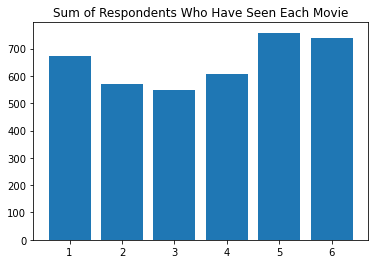

In [43]:
plt.bar(range(1,7), seen_total)
plt.title('Sum of Respondents Who Have Seen Each Movie')
plt.show()

We can see that the fifth movie has the most views by respondents, which is likely part of the reason why its average rank among respondents was better than any other movie in the series.

In [44]:
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
nonfans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

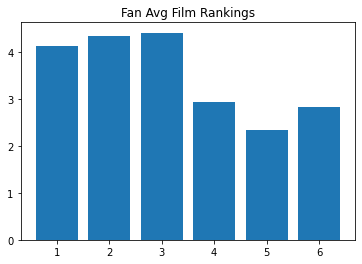

In [45]:
fans_rankings = fans[fans.columns[9:15]].mean()
plt.bar(range(1,7), fans_rankings)
plt.title('Fan Avg Film Rankings')
plt.show()

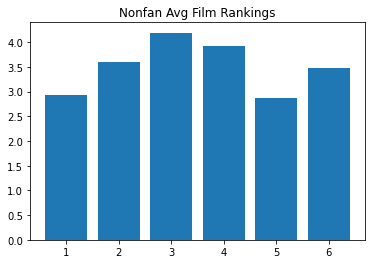

In [46]:
nonfans_rankings = nonfans[nonfans.columns[9:15]].mean()
plt.bar(range(1,7), nonfans_rankings)
plt.title('Nonfan Avg Film Rankings')
plt.show()

In [47]:
fans_seen_total = fans[fans.columns[3:9]].sum()
print(fans_seen_total)

seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64


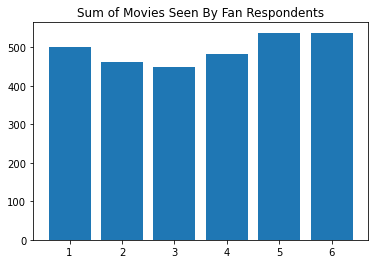

In [48]:
plt.bar(range(1,7), fans_seen_total)
plt.title('Sum of Movies Seen By Fan Respondents')
plt.show()

In [49]:
nonfans_seen_total = nonfans[nonfans.columns[3:9]].sum()
print(nonfans_seen_total)

seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64


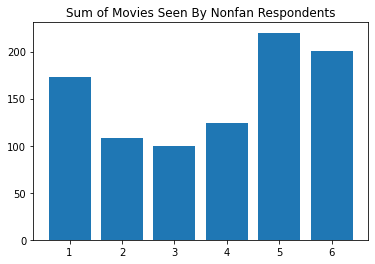

In [50]:
plt.bar(range(1,7), nonfans_seen_total)
plt.title('Sum of Movies Seen By Nonfan Respondents')
plt.show()

It looks like both fans and nonfans would consider the fifth movie of the series to be the best, but fans consider it the best by a much larger margin with a much larger sample size of views (450-530 for any given movie compared to nonfan sums of 100-250 for any given movie).